# Использование готовых моделей

Мы рассмотрели на лекции, что научное сообщество придумало и протестировало много моделей, которые до сих пор не перестают улучшать результаты. 

Движение open-source и эффективные, удобные фреймворки дали невероятный толчок развитию machine learning и deep learning потому что сократило путь от научной статьи до возможности применить описанные методы до нескольких минут -- ведь стало распростаненной практикой выкладывать архитектуры и веса к ним в открытый доступ. 

Как же получить доступ к таким полезным ресурсам? Новые статьи часто дают ссылку на github где подробно написано как можно использовать и обучать модели. 

А для самых распростаненных архитектур есть реализации прямо внутри библиотек. В этом уроке мы познакомимся с тем, как использовать готовые модели в Keras для классификации. Т.е. как производить **инференс**.



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


Для того чтобы получить доступ к реализованным моделям, достаточно обратится к tf.keras.applications. 

Например, попробуем определить знакому нам VGG19

In [2]:
vgg19 = tf.keras.applications.VGG19()

574726144/574710816 [==============================] - 9s 0us/step


In [3]:
# посмотрим на саммари
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# но модель инициализирована случайными весами. поэтому делать с помощью нее предсказания -- бесполезно
# с помощью weights='imagenet' -- инициализируем ее параметрами, которые получились при ее обучении на imagenet
# (они скачиваются из интернета)
vgg19 = tf.keras.applications.VGG19(weights='imagenet')

In [5]:
# скачаем несколько картинок
!wget https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg -O panda.jpg
!wget https://5.imimg.com/data5/CB/DA/MY-24779561/cricket-tennis-balls-500x500.jpg -O ball.jpg
!wget https://image.shutterstock.com/image-photo/luxury-house-beautiful-landscaping-on-260nw-448870624.jpg -O house.jpg

--2021-10-18 19:16:02--  https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg [following]
--2021-10-18 19:16:02--  https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K  --.-KB/s    in 0.02s   

2021-10-18 19:16:03 (5.38 MB/s) - ‘panda.jpg’ saved [116068/116068]

--2021-10-18 19:16:03--  https://5.imimg.com/data5/CB/DA/MY-

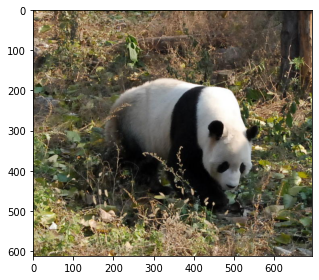

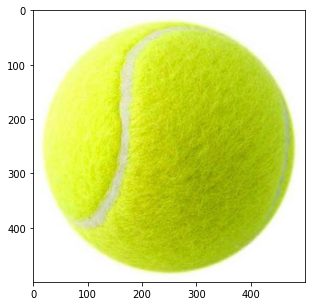

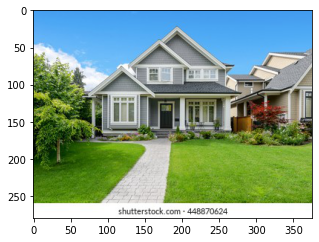

In [6]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

panda = read_and_show("panda.jpg")
ball = read_and_show("ball.jpg")
house = read_and_show("house.jpg")

In [7]:
# попробуем применить сеть к нашему изображению?
vgg19.predict(panda.astype(np.float32)[None, ...])

ValueError: ignored

In [8]:
# оказывается, модель ожидает определенный размер, учтем это

def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]


prepare_image(panda, (224, 224)).numpy().shape

(1, 224, 224, 3)

In [9]:
input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)

In [10]:
# что это?)
prediction

array([[1.26811550e-09, 3.44695550e-10, 3.22687264e-08, 5.80743142e-09,
        1.59081068e-08, 3.61620813e-08, 3.78847972e-07, 1.35859124e-09,
        2.15428475e-08, 6.56979249e-10, 1.51249263e-10, 1.48422952e-09,
        3.74347497e-11, 1.09397087e-08, 1.57303215e-09, 8.33320427e-11,
        1.26602374e-11, 1.62169176e-08, 5.11573539e-08, 1.30278082e-07,
        1.11702390e-10, 5.42669937e-11, 1.20430818e-10, 4.86385510e-09,
        5.09609438e-11, 1.74634127e-11, 6.35704857e-12, 1.71719485e-12,
        7.51462226e-11, 9.12550480e-09, 6.41466004e-12, 6.25386479e-11,
        1.00892333e-11, 4.55178917e-09, 1.04404443e-10, 5.48166859e-11,
        5.16543086e-10, 4.62332360e-11, 1.09567936e-11, 1.68759863e-12,
        2.47214402e-11, 1.18264545e-12, 2.68372970e-13, 3.49642190e-12,
        1.37551645e-12, 2.89462759e-10, 6.78023818e-11, 4.10795920e-12,
        9.53750301e-10, 3.84942044e-11, 4.19419638e-11, 8.46436166e-09,
        7.96191862e-11, 2.28020589e-11, 7.51535292e-11, 6.718193

In [11]:
prediction.sum(), prediction.shape # предсказали вероятности 1000 классов. а как расшифровать?

(1.0000001, (1, 1000))

In [12]:
from tensorflow.keras.applications.vgg19 import decode_predictions

input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

49152/35363 [=========================================] - 0s 0us/step


[[('n02510455', 'giant_panda', 0.96405154),
  ('n02395406', 'hog', 0.013967678),
  ('n02134084', 'ice_bear', 0.007813153),
  ('n02120079', 'Arctic_fox', 0.007052075),
  ('n02108915', 'French_bulldog', 0.0021671755)]]

На самом деле в примере выше нам повезло. Мы забыли очень важную часть -- препроцессинг картинки. Для каждой сети он свой и находитя рядом с ней:

In [13]:
from tensorflow.keras.applications.vgg19 import preprocess_input
# добавим этап препроцессинга и получим еще более правильный ответ
input_image = prepare_image(panda, (224, 224))
input_image = preprocess_input(input_image)
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

[[('n02510455', 'giant_panda', 0.99942386),
  ('n02445715', 'skunk', 0.00029818906),
  ('n02120079', 'Arctic_fox', 0.00017282202),
  ('n02395406', 'hog', 6.697354e-05),
  ('n02114548', 'white_wolf', 8.604859e-06)]]

In [14]:
# сделаем из этого удобную функцию

def make_prediction(model, preprocess_input, decode_predictions, image):
    img_size = (model.input_shape[1], model.input_shape[2])
    input_image = prepare_image(image, img_size)
    input_image = preprocess_input(input_image)
    print(f"Image shape: {input_image.shape}. Max: {input_image.numpy().max()}. Min: {input_image.numpy().min()}.")
    
    prediction = model.predict(input_image)
    return decode_predictions(prediction)

In [15]:
# и применим на мячике
make_prediction(vgg19, preprocess_input, decode_predictions, ball)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -103.93900299072266.


[[('n04409515', 'tennis_ball', 0.999806),
  ('n04039381', 'racket', 0.000120159566),
  ('n03445777', 'golf_ball', 3.160186e-05),
  ('n03134739', 'croquet_ball', 8.094177e-06),
  ('n07749582', 'lemon', 7.5195044e-06)]]

А теперь попробуем другую сеть -- MobileNetV2

In [16]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilenet = MobileNetV2(weights="imagenet")

14548992/14536120 [==============================] - 0s 0us/step


In [17]:
make_prediction(mobilenet, preprocess_input, decode_predictions, panda)
# почему неправильно ?? 

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.


[[('n09229709', 'bubble', 0.058035918),
  ('n04418357', 'theater_curtain', 0.050058268),
  ('n04442312', 'toaster', 0.034434628),
  ('n03388043', 'fountain', 0.026835293),
  ('n03733281', 'maze', 0.026332092)]]

**Мы применили препроцессинг одной сети к другой. Это и привело к неправильным предсказаниям.** Это очень важно. Всегда пытайтесь понять что именно на вход принимает та или иная сеть. Каким-то достаточно просто нормализации на 0-1, другие ожидают значения от -1 до 1. Будьте внимательны! И используйте правильные функции

In [18]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions as decode_predictions_mobilenet

make_prediction(mobilenet, preprocess_input_mobilenet, decode_predictions_mobilenet, panda)

Image shape: (1, 224, 224, 3). Max: 1.0. Min: -1.0.


[[('n02510455', 'giant_panda', 0.91129684),
  ('n02133161', 'American_black_bear', 0.0016244855),
  ('n04254680', 'soccer_ball', 0.0012084891),
  ('n02134084', 'ice_bear', 0.0011731127),
  ('n02412080', 'ram', 0.0011307894)]]

# Итог

Мы научились пользоваться готовыми моделями в Keras. А также на своем опыте убедились как важно правильно преобразовывать изображения перед инференсом. В практическом задании вы закрепите полученные знания.

# Практическое задание 

Выполните предсказания с помощью двух любых сетей из tf.keras.applications для любых картинок (скачать можно аналогично или использовать загруженные). Также вы можете раскрыть боковое меню справа. Перейти во вкладку Files и воспользоваться Upload.

In [21]:
vgg16 = tf.keras.applications.VGG16()
vgg16.summary()

vgg16 = tf.keras.applications.VGG16(weights='imagenet')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
!wget https://bipbap.ru/wp-content/uploads/2017/04/72fqw2qq3kxh.jpg -O sova.jpg
!wget https://bipbap.ru/wp-content/uploads/2017/04/807093396-e1621583639143.jpg -O tygre.jpg
!wget https://bipbap.ru/wp-content/uploads/2017/04/pticy-rasteniya-6666.jpg -O bird.jpg

--2021-10-18 20:26:18--  https://bipbap.ru/wp-content/uploads/2017/04/72fqw2qq3kxh.jpg
Resolving bipbap.ru (bipbap.ru)... 104.26.4.10, 172.67.73.39, 104.26.5.10, ...
Connecting to bipbap.ru (bipbap.ru)|104.26.4.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66472 (65K) [image/jpeg]
Saving to: ‘sova.jpg’

sova.jpg            100%[===================>]  64.91K  --.-KB/s    in 0.01s   

2021-10-18 20:26:19 (5.60 MB/s) - ‘sova.jpg’ saved [66472/66472]

--2021-10-18 20:26:19--  https://bipbap.ru/wp-content/uploads/2017/04/807093396-e1621583639143.jpg
Resolving bipbap.ru (bipbap.ru)... 104.26.4.10, 172.67.73.39, 104.26.5.10, ...
Connecting to bipbap.ru (bipbap.ru)|104.26.4.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452444 (442K) [image/jpeg]
Saving to: ‘tygre.jpg’

tygre.jpg           100%[===================>] 441.84K  --.-KB/s    in 0.05s   

2021-10-18 20:26:20 (8.95 MB/s) - ‘tygre.jpg’ saved [452444/452444]

--2021-10-18 20:

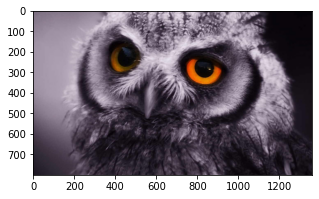

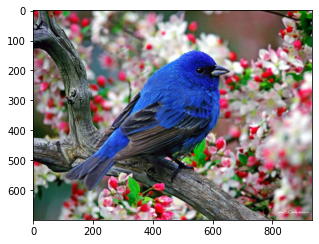

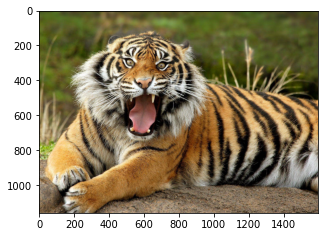

In [25]:
sova = read_and_show("sova.jpg")
bird = read_and_show("bird.jpg")
tygre = read_and_show("tygre.jpg")

In [26]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
new = sova

input_image = new
input_image = prepare_image(new, (224, 224))
input_image = preprocess_input(input_image)
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

[[('n01622779', 'great_grey_owl', 0.99999666),
  ('n01608432', 'kite', 1.8001413e-06),
  ('n02497673', 'Madagascar_cat', 8.058273e-07),
  ('n01798484', 'prairie_chicken', 2.699755e-07),
  ('n02018795', 'bustard', 1.94124e-07)]]

In [28]:

!wget https://domikdomovenka.ru/files/products/popugay_ara.600x600.jpg -O ara.jpg

--2021-10-18 20:36:14--  https://domikdomovenka.ru/files/products/popugay_ara.600x600.jpg
Resolving domikdomovenka.ru (domikdomovenka.ru)... 87.236.16.189
Connecting to domikdomovenka.ru (domikdomovenka.ru)|87.236.16.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32396 (32K) [image/jpeg]
Saving to: ‘ara.jpg’

ara.jpg             100%[===================>]  31.64K  --.-KB/s    in 0s      

2021-10-18 20:36:14 (138 MB/s) - ‘ara.jpg’ saved [32396/32396]



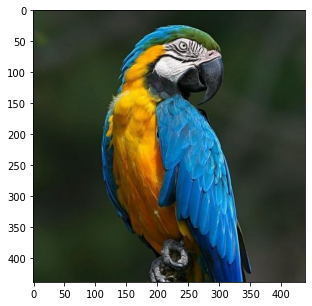

In [29]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

ara = read_and_show("ara.jpg")

In [30]:
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_predictions_resnet
from tensorflow.keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights="imagenet")
make_prediction(resnet, preprocess_input_resnet, decode_predictions_resnet, ara)

102981632/102967424 [==============================] - 1s 0us/step
Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.


[[('n01818515', 'macaw', 0.9991055),
  ('n01828970', 'bee_eater', 0.00035273578),
  ('n01820546', 'lorikeet', 0.00024979198),
  ('n01819313', 'sulphur-crested_cockatoo', 7.943775e-05),
  ('n01843383', 'toucan', 5.01866e-05)]]

In [32]:
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.xception import decode_predictions as decode_predictions_resnet
from tensorflow.keras.applications.xception import Xception

xception = Xception(weights="imagenet")
make_prediction(xception, preprocess_input_resnet, decode_predictions_resnet, panda)

Image shape: (1, 299, 299, 3). Max: 1.0. Min: -1.0.


[[('n02510455', 'giant_panda', 0.9162247),
  ('n02509815', 'lesser_panda', 0.0016466607),
  ('n02120079', 'Arctic_fox', 0.0015646439),
  ('n02134084', 'ice_bear', 0.0010266823),
  ('n04399382', 'teddy', 0.0009930024)]]

In [34]:
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_predictions_resnet
from tensorflow.keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights="imagenet")
make_prediction(resnet, preprocess_input_resnet, decode_predictions_resnet, ara)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.


[[('n01818515', 'macaw', 0.9991055),
  ('n01828970', 'bee_eater', 0.00035273578),
  ('n01820546', 'lorikeet', 0.00024979198),
  ('n01819313', 'sulphur-crested_cockatoo', 7.943775e-05),
  ('n01843383', 'toucan', 5.01866e-05)]]